## Data Engineering

We are going to create new variables, using all the information we have with data.

This notebook is worked simultaneously with the analyze notebook.
Here we create variable and we look if it is relevant to our model.



In [319]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 


# pandas display settings 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [320]:
from utils import utils_prep as prep

In [4]:
from utils import utils_eng as eng

In [5]:
#%ls data/

In [6]:
app_train=prep.readCsvFileFromDir("data/",'app_train_clean.csv')

In [7]:
app_train['SK_ID_CURR']=app_train.key_0
app_train.drop(columns=['key_0','Unnamed: 0'], inplace=True)
app_train.set_index('SK_ID_CURR', inplace=True)

In [8]:
app_train.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,12.061091,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.02470,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.634100,0.014400,0.00000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.02500,0.036900,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,0.014900,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,12.061091,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.510853,0.09590,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.804000,0.049700,0.08060,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.09680,0.052900,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,0.071400,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
100004,0,0,67500.0,135000.

In [9]:
prep.firstStats(app_train)

,stats
nbRows,307511
nbColumns,121
float64,65
int64,40
object,16


In [12]:
app_train.drop(app_train[app_train['CODE_GENDER']=='XNA'].index, inplace=True)

In [13]:
#app_train.columns.tolist()

## Feature Engineering 

We are going to try this strategy

#### quantitative data 
- detect most correlated variables
- construct pca on them to generate some new variables
- give them some name or significance
- do it recursively until you get all spaces of knowledge that the dataset has to offer

#### qualitative data

- encoding them with respect to the target variable and what we can get

- try some meaningfull domain feature engineering with them

- go beyond and lookup the complementary tables



In [14]:
df_qn=app_train.select_dtypes(['int64', 'float64']).drop('TARGET', axis=1)

df_ql=app_train.select_dtypes(['object'])

### let's start with quantitative data 

In [16]:
df_qn.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,12.061091,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.02470,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.634100,0.014400,0.00000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.02500,0.036900,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,0.014900,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,12.061091,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.510853,0.09590,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.804000,0.049700,0.08060,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.09680,0.052900,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,0.071400,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.000000,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.502130,0.555912,0.729567,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.07449,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.11785,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
100006,0,135000.0,312682.5,29686.5,2970

In [17]:
for i in df_qn.columns.tolist():
    print(eng.corrByVar(df_qn,i))


Variables that are very correlated with CNT_CHILDREN
                    corrz
CNT_FAM_MEMBERS  0.879158
DAYS_BIRTH       0.330937

Variables that are very correlated with AMT_INCOME_TOTAL
Empty DataFrame
Columns: [corrz]
Index: []

Variables that are very correlated with AMT_CREDIT
                    corrz
AMT_GOODS_PRICE  0.986590
AMT_ANNUITY      0.770126

Variables that are very correlated with AMT_ANNUITY
                    corrz
AMT_GOODS_PRICE  0.774661
AMT_CREDIT       0.770126

Variables that are very correlated with AMT_GOODS_PRICE
                corrz
AMT_CREDIT   0.986590
AMT_ANNUITY  0.774661

Variables that are very correlated with REGION_POPULATION_RELATIVE
                                corrz
REGION_RATING_CLIENT_W_CITY -0.531540
REGION_RATING_CLIENT        -0.532881

Variables that are very correlated with DAYS_BIRTH
                      corrz
FLAG_EMP_PHONE     0.619890
DAYS_REGISTRATION  0.331905
CNT_CHILDREN       0.330937
EXT_SOURCE_1      -0.358532
FLAG_DOCU


Variables that are very correlated with ENTRANCES_AVG
                          corrz
ENTRANCES_MEDI         0.996886
ENTRANCES_MODE         0.977742
LIVINGAREA_MODE        0.609159
LIVINGAREA_MEDI        0.605736
LIVINGAREA_AVG         0.605299
BASEMENTAREA_MODE      0.604097
BASEMENTAREA_MEDI      0.603535
BASEMENTAREA_AVG       0.601794
APARTMENTS_MODE        0.601539
APARTMENTS_MEDI        0.600652
APARTMENTS_AVG         0.600279
TOTALAREA_MODE         0.585715
LANDAREA_MEDI          0.471861
LANDAREA_MODE          0.471467
LANDAREA_AVG           0.469201
LIVINGAPARTMENTS_MODE  0.449479
LIVINGAPARTMENTS_MEDI  0.443732
LIVINGAPARTMENTS_AVG   0.441704
ELEVATORS_AVG          0.394579
ELEVATORS_MEDI         0.394264
ELEVATORS_MODE         0.393469

Variables that are very correlated with FLOORSMAX_AVG
                          corrz
FLOORSMAX_MEDI         0.997034
FLOORSMAX_MODE         0.985689
ELEVATORS_AVG          0.655981
ELEVATORS_MEDI         0.652345
ELEVATORS_MODE         0.6


Variables that are very correlated with ELEVATORS_MODE
                          corrz
ELEVATORS_MEDI         0.982828
ELEVATORS_AVG          0.978837
LIVINGAREA_MODE        0.827276
LIVINGAREA_MEDI        0.826592
LIVINGAREA_AVG         0.823250
APARTMENTS_MODE        0.804405
APARTMENTS_MEDI        0.803310
APARTMENTS_AVG         0.800191
TOTALAREA_MODE         0.796506
LIVINGAPARTMENTS_MODE  0.668690
LIVINGAPARTMENTS_MEDI  0.661827
LIVINGAPARTMENTS_AVG   0.657435
FLOORSMAX_MODE         0.638212
FLOORSMAX_AVG          0.632999
FLOORSMAX_MEDI         0.632623
BASEMENTAREA_MEDI      0.520297
BASEMENTAREA_AVG       0.519514
BASEMENTAREA_MODE      0.518053
FLOORSMIN_AVG          0.418297
FLOORSMIN_MODE         0.418085
FLOORSMIN_MEDI         0.417752
COMMONAREA_MODE        0.413412
COMMONAREA_MEDI        0.413349
COMMONAREA_AVG         0.412113
ENTRANCES_MEDI         0.393705
ENTRANCES_AVG          0.393469
ENTRANCES_MODE         0.391935
LANDAREA_MEDI          0.350274
LANDAREA_MODE   


Variables that are very correlated with YEARS_BEGINEXPLUATATION_MEDI
                                 corrz
YEARS_BEGINEXPLUATATION_AVG   0.993825
YEARS_BEGINEXPLUATATION_MODE  0.963539

Variables that are very correlated with YEARS_BUILD_MEDI
                          corrz
YEARS_BUILD_AVG        0.998495
YEARS_BUILD_MODE       0.989462
FLOORSMAX_MEDI         0.425220
FLOORSMAX_AVG          0.424413
FLOORSMAX_MODE         0.420355
FLOORSMIN_MEDI         0.346089
FLOORSMIN_AVG          0.345702
FLOORSMIN_MODE         0.339323
LIVINGAPARTMENTS_MEDI  0.316215
LIVINGAPARTMENTS_AVG   0.315005
LIVINGAPARTMENTS_MODE  0.307807
TOTALAREA_MODE         0.300320

Variables that are very correlated with COMMONAREA_MEDI
                          corrz
COMMONAREA_AVG         0.995978
COMMONAREA_MODE        0.979887
LIVINGAPARTMENTS_MEDI  0.512647
LIVINGAPARTMENTS_AVG   0.509476
LIVINGAPARTMENTS_MODE  0.506414
TOTALAREA_MODE         0.439065
LIVINGAREA_MEDI        0.435469
LIVINGAREA_AVG         0.4


Variables that are very correlated with OBS_30_CNT_SOCIAL_CIRCLE
                             corrz
OBS_60_CNT_SOCIAL_CIRCLE  0.998489
DEF_30_CNT_SOCIAL_CIRCLE  0.329274

Variables that are very correlated with DEF_30_CNT_SOCIAL_CIRCLE
                             corrz
DEF_60_CNT_SOCIAL_CIRCLE  0.860480
OBS_60_CNT_SOCIAL_CIRCLE  0.331506
OBS_30_CNT_SOCIAL_CIRCLE  0.329274

Variables that are very correlated with OBS_60_CNT_SOCIAL_CIRCLE
                             corrz
OBS_30_CNT_SOCIAL_CIRCLE  0.998489
DEF_30_CNT_SOCIAL_CIRCLE  0.331506

Variables that are very correlated with DEF_60_CNT_SOCIAL_CIRCLE
                            corrz
DEF_30_CNT_SOCIAL_CIRCLE  0.86048

Variables that are very correlated with DAYS_LAST_PHONE_CHANGE
Empty DataFrame
Columns: [corrz]
Index: []

Variables that are very correlated with FLAG_DOCUMENT_2
Empty DataFrame
Columns: [corrz]
Index: []


KeyboardInterrupt: 

In [321]:
#for i in df_qn.columns.tolist():
 #   print(eng.corrByVarList(df_qn,i))

In [24]:
L=['LIVINGAREA_AVG','LIVINGAPARTMENTS_AVG','LANDAREA_AVG','FLOORSMAX_AVG','BASEMENTAREA_MODE','FLOORSMAX_MEDI',
 'LIVINGAPARTMENTS_MEDI','YEARS_BUILD_MODE', 'APARTMENTS_MODE','COMMONAREA_MEDI','APARTMENTS_AVG','YEARS_BUILD_AVG',
 'BASEMENTAREA_AVG','FLOORSMAX_MODE','FLOORSMIN_MODE','LIVINGAREA_MEDI', 'BASEMENTAREA_MEDI','ENTRANCES_MEDI',
 'FLOORSMIN_MEDI','ELEVATORS_MODE','LIVINGAPARTMENTS_MODE','ELEVATORS_MEDI','TOTALAREA_MODE','COMMONAREA_AVG',
 'COMMONAREA_MODE', 'FLOORSMIN_AVG','LIVINGAREA_MODE','LANDAREA_MODE', 'YEARS_BUILD_MEDI','LANDAREA_MEDI',
 'ENTRANCES_AVG','APARTMENTS_MEDI','ENTRANCES_MODE', 'ELEVATORS_AVG']

In [33]:
LIVING_CONDITION=[i for i in set(L)]

From correlation study we know that those variables are very linked and they share many information in common.

We are going to use PCA to reduce the dimension.

The strategy is to use a union of many independantes subspaces

In [36]:
df1=df_qn[[x for x in LIVING_CONDITION]]

In [37]:
A, B, C= eng.pcaDataFrame(df1)

In [38]:
C.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,-6.408787,1.480125,1.513177e+00,-1.292673,0.796094,0.670029,0.622204,0.188686,-0.710794,-0.283371,2.598507e-02,-2.821488e-02,-0.048628,-1.083037e-02,-3.525940e-02,-2.771679e-02,4.301330e-03,1.865350e-02,-1.399377e-02,7.417856e-03,-2.409752e-02,2.732490e-03,2.630766e-03,2.000942e-03,-8.580315e-04,3.046506e-03,5.805573e-03,-4.915008e-04,-1.430880e-03,4.660739e-04,-9.768340e-04,7.206955e-04,2.101120e-03,4.208058e-04
100003,-1.338809,-4.251276,3.973807e-01,0.305956,0.129116,-0.103132,0.637529,-0.003849,-0.416315,-0.262365,6.147362e-01,1.094509e-02,-0.110381,-1.244353e-01,5.258494e-02,-7.850322e-02,-4.248844e-03,8.599552e-02,-3.733429e-03,-3.374023e-02,-1.615016e-02,-4.334762e-03,-1.973350e-02,-8.095192e-04,3.638435e-02,-4.682854e-03,-1.593847e-02,-1.099939e-02,-1.733696e-02,3.472499e-04,4.800122e-04,-1.769502e-03,-6.519848e-04,-2.713291e-03
100004,-0.000041,0.000007,-9.702263e-07,0.000011,-0.000007,0.000003,0.000005,0.000007,-0.000005,-0.000002,-6.683205e-07,1.449622e-07,-0.000001,-2.237710e-07,6.827610e-09,-1.769128e-07,1.015984e-07,3.062909e-07,-1.579175e-07,-2.851346e-08,-4.067241e-08,-2.678432e-08,5.165254e-08,-1.567407e-08,2.692479e-09,3.152119e-09,4.471898e-08,-1.155733e-08,2.616418e-08,2.534073e-09,-3.738806e-09,1.736236e-09,-7.370708e-09,-1.207601e-08
100006,-0.000041,0.000007,-9.702264e-07,0.000011,-0.000007,0.000003,0.000005,0.000007,-0.000005,-0.000002,-6.683204e-07,1.449618e-07,-0.000001,-2.237716e-07,6.827045e-09,-1.769125e-07,1.015981e-07,3.062911e-07,-1.579181e-07,-2.851316e-08,-4.067256e-08,-2.678511e-08,5.165171e-08,-1.567385e-08,2.692326e-09,3.151691e-09,4.471827e-08,-1.155819e-08,2.616477e-08,2.534817e-09,-3.739452e-09,1.736151e-09,-7.369505e-09,-1.207546e-08
100007,-0.000041,0.000007,-9.702270e-07,0.000011,-0.000007,0.000003,0.000005,0.000007,-0.000005,-0.000002,-6.683206e-07,1.449621e-07,-0.000001,-2.237716e-07,6.827232e-09,-1.769126e-07,1.015979e-07,3.062906e-07,-1.579175e-07,-2.851301e-08,-4.067229e-08,-2.678442e-08,5.165288e-08,-1.567395e-08,2.692579e-09,3.153014e-09,4.471889e-08,-1.155779e-08,2.616459e-08,2.534341e-09,-3.739048e-09,1.736171e-09,-7.370466e-09,-1.207624e-08


In [45]:
np.cumsum(B.explained_variance_ratio_*100)

array([ 50.52481994,  64.41033292,  71.50263731,  78.20648817,
        83.61384928,  88.05919415,  91.520394  ,  94.62702973,
        96.65080514,  97.76692692,  98.66133358,  99.12900658,
        99.43378297,  99.51158412,  99.57605126,  99.63824669,
        99.6891062 ,  99.73538368,  99.77642196,  99.81097   ,
        99.84108904,  99.86567881,  99.88845313,  99.90978502,
        99.93012311,  99.94436517,  99.95631399,  99.96702424,
        99.97752517,  99.98285658,  99.98795825,  99.99225068,
        99.99624974, 100.        ])

In [47]:
# init a dataframe
df_eng=pd.DataFrame(index=df_qn.index)
# and create new variables
df_eng['LIVING_CONDITION_1']=C.PC_1
df_eng['LIVING_CONDITION_2']=C.PC_2
df_eng['LIVING_CONDITION_3']=C.PC_3
df_eng['LIVING_CONDITION_4']=C.PC_4
df_eng['LIVING_CONDITION_5']=C.PC_5
df_eng['LIVING_CONDITION_6']=C.PC_6
df_eng['LIVING_CONDITION_7']=C.PC_7
df_eng['LIVING_CONDITION_8']=C.PC_8
df_eng['LIVING_CONDITION_9']=C.PC_9
df_eng['LIVING_CONDITION_10']=C.PC_10

In [322]:
#df_eng.head()

In [323]:
# Groupe very correlatedd vraibles that describe the life style of the loanner
L=['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_WORK_CITY' , 'LIVE_CITY_NOT_WORK_CITY']

In [325]:
df_qn[L].head()

,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
SK_ID_CURR,,,,,,
100002,0,0,0,0,0,0
100003,0,0,0,0,0,0
100004,0,0,0,0,0,0
100006,0,0,0,0,0,0
100007,0,0,0,0,1,1


In [58]:
A, B, C=eng.pcaDataFrame(df_qn[L])

In [59]:
B.explained_variance_ratio_

array([0.41327457, 0.24765342, 0.20844755, 0.10759445, 0.01456537,
       0.00846464])

In [60]:
C.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
SK_ID_CURR,,,,,,
100002,-0.774325,0.336859,-0.000782,0.036011,0.003530,-0.003181
100003,-0.774325,0.336859,-0.000782,0.036011,0.003530,-0.003181
100004,-0.774325,0.336859,-0.000782,0.036011,0.003530,-0.003181
100006,-0.774325,0.336859,-0.000782,0.036011,0.003530,-0.003181
100007,1.420580,-2.169821,-0.914352,0.734947,-0.039126,0.025269


In [61]:
df_eng['LIFE_STYLE_1']=C.PC_1
df_eng['LIFE_STYLE_2']=C.PC_2
df_eng['LIFE_STYLE_3']=C.PC_3
df_eng['LIFE_STYLE_4']=C.PC_4

In [62]:
L=['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

In [63]:
df_qn[L].head()

,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
SK_ID_CURR,,,,
100002,2.0,2.0,2.0,2.0
100003,1.0,1.0,0.0,0.0
100004,0.0,0.0,0.0,0.0
100006,2.0,2.0,0.0,0.0
100007,0.0,0.0,0.0,0.0


In [64]:
A, B, C=eng.pcaDataFrame(df_qn[L])

In [66]:
np.round(B.explained_variance_ratio_, 1)

array([0.6, 0.3, 0. , 0. ])

In [67]:
df_eng['SOCIAL_CIRCLE_1']=C.PC_1
df_eng['SOCIAL_CIRCUL_2']=C.PC_2

In [68]:
L=['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'REGION_POPULATION_RELATIVE']

In [69]:
df_qn[L].head()

,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE
SK_ID_CURR,,,
100002,2,2,0.018801
100003,1,1,0.003541
100004,2,2,0.010032
100006,2,2,0.008019
100007,2,2,0.028663


In [70]:
A, B, C=eng.pcaDataFrame(df_qn[L])

In [71]:
B.explained_variance_ratio_

array([0.78855247, 0.19506187, 0.01638566])

In [72]:
df_eng['REGION_RATING_1']=C.PC_1
df_eng['REGION_RATING_2']=C.PC_2

In [ ]:
#L=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY']

Let's some domain variables built by combining some existing variables that represent wealth situation

In [73]:
df_eng['AMT_GOOD_PRICE_ANNUITY_RATIO']=df_qn.AMT_GOODS_PRICE/df_qn.AMT_ANNUITY
df_eng['AMT_CREDIT_ANNUITY_RATIO']= df_qn.AMT_CREDIT/df_qn.AMT_ANNUITY
df_eng['AMT_CREDIT_GOODS_PRICE_RATIO']= df_qn.AMT_CREDIT/df_qn.AMT_GOODS_PRICE
df_eng['AMT_CREDIT_INCOME_RATIO']= df_qn.AMT_CREDIT/df_qn.AMT_INCOME_TOTAL

In [90]:
# some other variables
# EXT_SOURCE_2 EXT_SOURCE_3
df_eng['EXT_SOURCE_1']= df_qn['EXT_SOURCE_1']
df_eng['EXT_SOURCE_2']= df_qn['EXT_SOURCE_2']
df_eng['EXT_SOURCE_3']= df_qn['EXT_SOURCE_3']


In [99]:
L=['DAYS_BIRTH', 'FLAG_EMP_PHONE', 'DAYS_REGISTRATION', 
 'CNT_CHILDREN', 'EXT_SOURCE_1', 'FLAG_DOCUMENT_6', 'DAYS_EMPLOYED']

In [100]:
df_qn[L].head()

,DAYS_BIRTH,FLAG_EMP_PHONE,DAYS_REGISTRATION,CNT_CHILDREN,EXT_SOURCE_1,FLAG_DOCUMENT_6,DAYS_EMPLOYED
SK_ID_CURR,,,,,,,
100002,-9461,1,-3648.0,0,0.083037,0,-637
100003,-16765,1,-1186.0,0,0.311267,0,-1188
100004,-19046,1,-4260.0,0,0.502130,0,-225
100006,-19005,1,-9833.0,0,0.502130,0,-3039
100007,-19932,1,-4311.0,0,0.502130,0,-3038


In [121]:
df_eng['INCOME_AGE_RATIO']=df_qn.AMT_INCOME_TOTAL/np.where(abs(df_qn.DAYS_BIRTH)==0,np.mean(abs(df_qn.DAYS_BIRTH)),
                                                           abs(df_qn.DAYS_BIRTH))
df_eng['FAMILY_INCOME_RATIO']=df_qn.AMT_INCOME_TOTAL/np.where(df_qn.CNT_CHILDREN==0,1, df_qn.CNT_CHILDREN)

df_eng['CREDIT_AGE_RATIO']=df_qn.AMT_CREDIT/np.where(abs(df_qn.DAYS_BIRTH)==0,np.mean(abs(df_qn.DAYS_BIRTH)),
                                                           abs(df_qn.DAYS_BIRTH))
df_eng['CREDIT_DAYS_REGISTRATION_RATIO']= df_qn.AMT_CREDIT/np.where(abs(df_qn.DAYS_REGISTRATION)==0,
                                                                    np.mean(abs(df_qn.DAYS_REGISTRATION)),
                                                           abs(df_qn.DAYS_REGISTRATION))
df_eng['CREDIT_DAYS_EMPLOYED_RATIO']= df_qn.AMT_CREDIT/np.where(abs(df_qn.DAYS_EMPLOYED)==0,
                                                                    np.mean(abs(df_qn.DAYS_EMPLOYED)),
                                                           abs(df_qn.DAYS_EMPLOYED))
df_eng['INCOME_DAYS_EMPLOYED_RATIO']= df_qn.AMT_INCOME_TOTAL/np.where(abs(df_qn.DAYS_EMPLOYED)==0,
                                                                    np.mean(abs(df_qn.DAYS_EMPLOYED)),
                                                           abs(df_qn.DAYS_EMPLOYED))
df_eng['DAYS_EMPLOYED_BIRTH_RATIO']= np.where(abs(df_qn.DAYS_BIRTH)==0,np.mean(abs(df_qn.DAYS_BIRTH)), 
                                              abs(df_qn.DAYS_BIRTH))/np.where(abs(df_qn.DAYS_EMPLOYED)==0,
                                                                    np.mean(abs(df_qn.DAYS_EMPLOYED)),
                                                           abs(df_qn.DAYS_EMPLOYED))
df_eng['SOURCE_1_AGE_RATIO']=df_qn.EXT_SOURCE_1/np.where(abs(df_qn.DAYS_BIRTH)==0,np.mean(abs(df_qn.DAYS_BIRTH)),
                                                           abs(df_qn.DAYS_BIRTH))
df_eng['SOURCE_1_EMPLOYED_RATIO']=df_qn.EXT_SOURCE_1/np.where(abs(df_qn.DAYS_EMPLOYED)==0,
                                                              np.mean(abs(df_qn.DAYS_EMPLOYED)),
                                                           abs(df_qn.DAYS_EMPLOYED))

In [120]:
# you can keep on increasing domain variables

In [326]:
#df_eng.head()


## Feature engineering on qualitative data

In [164]:
# work qualitative data
df_ql.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,
100002,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
100003,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
100004,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,Unknown,Unknown,Unknown,Unknown
100006,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,Unknown,Unknown,Unknown,Unknown
100007,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,Unknown,Unknown,Unknown,Unknown


In [165]:
prep.describeData(df_ql)


 La frequence de la variable NAME_CONTRACT_TYPE
 Cash loans         278232
Revolving loans     29275
Name: NAME_CONTRACT_TYPE, dtype: int64

 La frequence de la variable CODE_GENDER
 F    202448
M    105059
Name: CODE_GENDER, dtype: int64

 La frequence de la variable FLAG_OWN_CAR
 N    202922
Y    104585
Name: FLAG_OWN_CAR, dtype: int64

 La frequence de la variable FLAG_OWN_REALTY
 Y    213308
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

 La frequence de la variable NAME_TYPE_SUITE
 Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Unknown              1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

 La frequence de la variable NAME_INCOME_TYPE
 Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                

In [166]:
df_ql.shape

(307507, 16)

In [327]:
df_eng.shape

(307507, 34)

In [ ]:
#

# 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'WEEKDAY_APPR_PROCESS_START'
# 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE'
# 'WALLSMATERIAL_MODE ' 'EMERGENCYSTATE_MODE'


In [ ]:
# Let's try some feature eng with dichotomic variables

In [328]:
df_ql_eng=df_eng.copy()

In [213]:
df_ql_eng.head()

,LIVING_CONDITION_1,LIVING_CONDITION_2,LIVING_CONDITION_3,LIVING_CONDITION_4,LIVING_CONDITION_5,LIVING_CONDITION_6,LIVING_CONDITION_7,LIVING_CONDITION_8,LIVING_CONDITION_9,LIVING_CONDITION_10,LIFE_STYLE_1,LIFE_STYLE_2,LIFE_STYLE_3,LIFE_STYLE_4,SOCIAL_CIRCLE_1,SOCIAL_CIRCUL_2,REGION_RATING_1,REGION_RATING_2,AMT_GOOD_PRICE_ANNUITY_RATIO,AMT_CREDIT_ANNUITY_RATIO,AMT_CREDIT_GOODS_PRICE_RATIO,AMT_CREDIT_INCOME_RATIO,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,INCOME_AGE_RATIO,FAMILY_INCOME_RATIO,CREDIT_AGE_RATIO,CREDIT_DAYS_REGISTRATION_RATIO,CREDIT_DAYS_EMPLOYED_RATIO,INCOME_DAYS_EMPLOYED_RATIO,DAYS_EMPLOYED_BIRTH_RATIO,SOURCE_1_AGE_RATIO,SOURCE_1_EMPLOYED_RATIO
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,-6.408787,1.480125,1.513177e+00,-1.292673,0.796094,0.670029,0.622204,0.188686,-0.710794,-0.283371,-0.774325,0.336859,-0.000782,0.036011,4.659514,-4.783791,0.030519,0.187410,14.210239,16.461104,1.158397,2.007889,0.083037,0.262949,0.139376,21.403657,202500.0,42.976165,111.457648,638.300628,317.896389,14.852433,0.000009,0.000130
100003,-1.338809,-4.251276,3.973807e-01,0.305956,0.129116,-0.103132,0.637529,-0.003849,-0.416315,-0.262365,-0.774325,0.336859,-0.000782,0.036011,-0.464753,0.152739,1.946381,2.503095,31.639985,36.234085,1.145199,4.790750,0.311267,0.622246,0.510853,16.104981,270000.0,77.154936,1090.642917,1088.806818,227.272727,14.111953,0.000019,0.000262
100004,-0.000041,0.000007,-9.702263e-07,0.000011,-0.000007,0.000003,0.000005,0.000007,-0.000005,-0.000002,-0.774325,0.336859,-0.000782,0.036011,-0.907958,-0.239759,-0.275499,0.742662,20.000000,20.000000,1.000000,2.000000,0.502130,0.555912,0.729567,3.544051,67500.0,7.088102,31.690141,600.000000,300.000000,84.648889,0.000026,0.002232
100006,-0.000041,0.000007,-9.702264e-07,0.000011,-0.000007,0.000003,0.000005,0.000007,-0.000005,-0.000002,-0.774325,0.336859,-0.000782,0.036011,-0.021548,0.545236,-0.345748,0.870125,10.004548,10.532818,1.052803,2.316167,0.502130,0.650442,0.510853,7.103394,135000.0,16.452644,31.799298,102.889931,44.422507,6.253702,0.000026,0.000165
100007,-0.000041,0.000007,-9.702270e-07,0.000011,-0.000007,0.000003,0.000005,0.000007,-0.000005,-0.000002,1.420580,-2.169821,-0.914352,0.734947,-0.907958,-0.239759,0.374681,-0.437050,23.461618,23.461618,1.000000,4.222222,0.502130,0.322738,0.510853,6.095725,121500.0,25.737508,118.997912,168.861093,39.993417,6.560895,0.000025,0.000165


In [214]:
df_ql_eng['INCOME_BY_CONTRACT_TYPE'] = dt['NAME_CONTRACT_TYPE_Revolving loans']*df_qn['AMT_INCOME_TOTAL']
df_ql_eng['INCOME_BY_GENDER_IND'] = dt['CODE_GENDER_M']* df_qn['AMT_INCOME_TOTAL']
df_ql_eng['INCOME_BY_OWN_CAR_IND'] = dt['FLAG_OWN_CAR_Y']* df_qn['AMT_INCOME_TOTAL']
df_ql_eng['INCOME_BY_OWN_REALTY_IND'] = dt['FLAG_OWN_REALTY_Y']* df_qn['AMT_INCOME_TOTAL']


df_ql_eng['SOURCE2_BY_CONTRACT_TYPE'] = dt['NAME_CONTRACT_TYPE_Revolving loans']*df_qn['EXT_SOURCE_2']
df_ql_eng['SOURCE2_BY_GENDER_IND'] = dt['CODE_GENDER_M']* df_qn['EXT_SOURCE_2']
df_ql_eng['SOURCE2_BY_OWN_CAR_IND'] = dt['FLAG_OWN_CAR_Y']* df_qn['EXT_SOURCE_2']
df_ql_eng['SOURCE2_BY_OWN_REALTY_IND'] = dt['FLAG_OWN_REALTY_Y']* df_qn['EXT_SOURCE_2']

df_ql_eng['SOURCE3_BY_CONTRACT_TYPE'] = dt['NAME_CONTRACT_TYPE_Revolving loans']*df_qn['EXT_SOURCE_3']
df_ql_eng['SOURCE3_BY_GENDER_IND'] = dt['CODE_GENDER_M']* df_qn['EXT_SOURCE_3']
df_ql_eng['SOURCE3_BY_OWN_CAR_IND'] = dt['FLAG_OWN_CAR_Y']* df_qn['EXT_SOURCE_3']
df_ql_eng['SOURCE3_BY_OWN_REALTY_IND'] = dt['FLAG_OWN_REALTY_Y']* df_qn['EXT_SOURCE_3']


In [168]:
df_ql_dum=pd.get_dummies(df_ql,drop_first=True)

In [169]:
df_ql_dum.shape

(307507, 129)

In [170]:
df_ql_dum.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_Unknown,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Unknown,WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Unknown,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,

In [226]:
colz= [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE']

In [263]:
dt.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y
SK_ID_CURR,,,,
100002,0,1,0,1
100003,0,0,0,0
100004,1,1,1,1
100006,0,0,0,1
100007,0,1,0,1


In [297]:
df_qn_in=np.abs(df_qn[colz])

In [298]:
df_qn_in.head()
# you shoould decrease the number of columns 

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE
SK_ID_CURR,,,,,,,,,,
100002,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,12.061091
100003,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,12.061091
100004,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,26.000000
100006,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,12.061091
100007,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,12.061091


In [329]:
df_ql_inp=df_ql.copy()

In [330]:
df_ql_inp.shape

(307507, 16)

In [331]:
# In can be done using this 
def count_mappings(df, variable):
    return df[variable].value_counts().to_dict()

def frequency_mappings(df, variable):
    return (df[variable].value_counts() / len(df)).to_dict()

def encode(df, variable, mapping):
    df[variable] = df[variable].map(mapping)

In [300]:
#frequency_mappings(df_ql_inp, 'NAME_HOUSING_TYPE')

In [272]:
vars_categorical = df_ql_inp.columns
for variable in vars_categorical:
    mappings = count_mappings(df_ql_inp, variable)
    encode(df_ql_inp, variable, mappings)

In [332]:
vars_categorical = df_ql_inp.columns
for variable in vars_categorical:
    mappings = frequency_mappings(df_ql_inp, variable)
    encode(df_ql_inp, variable, mappings)

In [333]:
df_ql_inp.shape

(307507, 16)

In [341]:
df_ql_inp.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,
100002,0.904799,0.341648,0.659894,0.693669,0.808186,0.516317,0.710192,0.147782,0.887346,0.179463,0.168887,0.221107,0.240089,0.489420,0.210769,0.518443
100003,0.904799,0.658352,0.659894,0.306331,0.130560,0.070577,0.243448,0.638779,0.887346,0.089653,0.164920,0.028920,0.240089,0.489420,0.030090,0.518443
100004,0.095201,0.341648,0.340106,0.693669,0.808186,0.516317,0.710192,0.147782,0.887346,0.179463,0.164920,0.033833,0.683864,0.501764,0.508411,0.473986
100006,0.904799,0.658352,0.659894,0.693669,0.808186,0.516317,0.710192,0.096824,0.887346,0.179463,0.168887,0.221107,0.683864,0.501764,0.508411,0.473986
100007,0.904799,0.341648,0.659894,0.693669,0.808186,0.516317,0.710192,0.147782,0.887346,0.089653,0.164517,0.000276,0.683864,0.501764,0.508411,0.473986


In [342]:
df_qn_in.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE
SK_ID_CURR,,,,,,,,,,
100002,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,12.061091
100003,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,12.061091
100004,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,26.000000
100006,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,12.061091
100007,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,12.061091


In [337]:
def columnsProduct(dfx, dfy):
    df=pd.DataFrame(index=dfx.index)
    
    for x in dfx.columns.tolist():
        for y in dfy.columns.tolist():
            df[x+'_'+y]=dfx[x] * dfy[y]
    return df

In [338]:
df_qn_ql=columnsProduct(df_qn_in, df_ql_inp)

In [340]:
df_qn_ql.head()

,AMT_INCOME_TOTAL_NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL_CODE_GENDER,AMT_INCOME_TOTAL_FLAG_OWN_CAR,AMT_INCOME_TOTAL_FLAG_OWN_REALTY,AMT_INCOME_TOTAL_NAME_TYPE_SUITE,AMT_INCOME_TOTAL_NAME_INCOME_TYPE,AMT_INCOME_TOTAL_NAME_EDUCATION_TYPE,AMT_INCOME_TOTAL_NAME_FAMILY_STATUS,AMT_INCOME_TOTAL_NAME_HOUSING_TYPE,AMT_INCOME_TOTAL_OCCUPATION_TYPE,AMT_INCOME_TOTAL_WEEKDAY_APPR_PROCESS_START,AMT_INCOME_TOTAL_ORGANIZATION_TYPE,AMT_INCOME_TOTAL_FONDKAPREMONT_MODE,AMT_INCOME_TOTAL_HOUSETYPE_MODE,AMT_INCOME_TOTAL_WALLSMATERIAL_MODE,AMT_INCOME_TOTAL_EMERGENCYSTATE_MODE,AMT_CREDIT_NAME_CONTRACT_TYPE,AMT_CREDIT_CODE_GENDER,AMT_CREDIT_FLAG_OWN_CAR,AMT_CREDIT_FLAG_OWN_REALTY,AMT_CREDIT_NAME_TYPE_SUITE,AMT_CREDIT_NAME_INCOME_TYPE,AMT_CREDIT_NAME_EDUCATION_TYPE,AMT_CREDIT_NAME_FAMILY_STATUS,AMT_CREDIT_NAME_HOUSING_TYPE,AMT_CREDIT_OCCUPATION_TYPE,AMT_CREDIT_WEEKDAY_APPR_PROCESS_START,AMT_CREDIT_ORGANIZATION_TYPE,AMT_CREDIT_FONDKAPREMONT_MODE,AMT_CREDIT_HOUSETYPE_MODE,AMT_CREDIT_WALLSMATERIAL_MODE,AMT_CREDIT_EMERGENCYSTATE_MODE,AMT_ANNUITY_NAME_CONTRACT_TYPE,AMT_ANNUITY_CODE_GENDER,AMT_ANNUITY_FLAG_OWN_CAR,AMT_ANNUITY_FLAG_OWN_REALTY,AMT_ANNUITY_NAME_TYPE_SUITE,AMT_ANNUITY_NAME_INCOME_TYPE,AMT_ANNUITY_NAME_EDUCATION_TYPE,AMT_ANNUITY_NAME_FAMILY_STATUS,AMT_ANNUITY_NAME_HOUSING_TYPE,AMT_ANNUITY_OCCUPATION_TYPE,AMT_ANNUITY_WEEKDAY_APPR_PROCESS_START,AMT_ANNUITY_ORGANIZATION_TYPE,AMT_ANNUITY_FONDKAPREMONT_MODE,AMT_ANNUITY_HOUSETYPE_MODE,AMT_ANNUITY_WALLSMATERIAL_MODE,AMT_ANNUITY_EMERGENCYSTATE_MODE,AMT_GOODS_PRICE_NAME_CONTRACT_TYPE,AMT_GOODS_PRICE_CODE_GENDER,AMT_GOODS_PRICE_FLAG_OWN_CAR,AMT_GOODS_PRICE_FLAG_OWN_REALTY,AMT_GOODS_PRICE_NAME_TYPE_SUITE,AMT_GOODS_PRICE_NAME_INCOME_TYPE,AMT_GOODS_PRICE_NAME_EDUCATION_TYPE,AMT_GOODS_PRICE_NAME_FAMILY_STATUS,AMT_GOODS_PRICE_NAME_HOUSING_TYPE,AMT_GOODS_PRICE_OCCUPATION_TYPE,AMT_GOODS_PRICE_WEEKDAY_APPR_PROCESS_START,AMT_GOODS_PRICE_ORGANIZATION_TYPE,AMT_GOODS_PRICE_FONDKAPREMONT_MODE,AMT_GOODS_PRICE_HOUSETYPE_MODE,AMT_GOODS_PRICE_WALLSMATERIAL_MODE,AMT_GOODS_PRICE_EMERGENCYSTATE_MODE,REGION_POPULATION_RELATIVE_NAME_CONTRACT_TYPE,REGION_POPULATION_RELATIVE_CODE_GENDER,REGION_POPULATION_RELATIVE_FLAG_OWN_CAR,REGION_POPULATION_RELATIVE_FLAG_OWN_REALTY,REGION_POPULATION_RELATIVE_NAME_TYPE_SUITE,REGION_POPULATION_RELATIVE_NAME_INCOME_TYPE,REGION_POPULATION_RELATIVE_NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE_NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE_NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE_OCCUPATION_TYPE,REGION_POPULATION_RELATIVE_WEEKDAY_APPR_PROCESS_START,REGION_POPULATION_RELATIVE_ORGANIZATION_TYPE,REGION_POPULATION_RELATIVE_FONDKAPREMONT_MODE,REGION_POPULATION_RELATIVE_HOUSETYPE_MODE,REGION_POPULATION_RELATIVE_WALLSMATERIAL_MODE,REGION_POPULATION_RELATIVE_EMERGENCYSTATE_MODE,DAYS_BIRTH_NAME_CONTRACT_TYPE,DAYS_BIRTH_CODE_GENDER,DAYS_BIRTH_FLAG_OWN_CAR,DAYS_BIRTH_FLAG_OWN_REALTY,DAYS_BIRTH_NAME_TYPE_SUITE,DAYS_BIRTH_NAME_INCOME_TYPE,DAYS_BIRTH_NAME_EDUCATION_TYPE,DAYS_BIRTH_NAME_FAMILY_STATUS,DAYS_BIRTH_NAME_HOUSING_TYPE,DAYS_BIRTH_OCCUPATION_TYPE,DAYS_BIRTH_WEEKDAY_APPR_PROCESS_START,DAYS_BIRTH_ORGANIZATION_TYPE,DAYS_BIRTH_FONDKAPREMONT_MODE,DAYS_BIRTH_HOUSETYPE_MODE,DAYS_BIRTH_WALLSMATERIAL_MODE,DAYS_BIRTH_EMERGENCYSTATE_MODE,DAYS_EMPLOYED_NAME_CONTRACT_TYPE,DAYS_EMPLOYED_CODE_GENDER,DAYS_EMPLOYED_FLAG_OWN_CAR,DAYS_EMPLOYED_FLAG_OWN_REALTY,DAYS_EMPLOYED_NAME_TYPE_SUITE,DAYS_EMPLOYED_NAME_INCOME_TYPE,DAYS_EMPLOYED_NAME_EDUCATION_TYPE,DAYS_EMPLOYED_NAME_FAMILY_STATUS,DAYS_EMPLOYED_NAME_HOUSING_TYPE,DAYS_EMPLOYED_OCCUPATION_TYPE,DAYS_EMPLOYED_WEEKDAY_APPR_PROCESS_START,DAYS_EMPLOYED_ORGANIZATION_TYPE,DAYS_EMPLOYED_FONDKAPREMONT_MODE,DAYS_EMPLOYED_HOUSETYPE_MODE,DAYS_EMPLOYED_WALLSMATERIAL_MODE,DAYS_EMPLOYED_EMERGENCYSTATE_MODE,DAYS_REGISTRATION_NAME_CONTRACT_TYPE,DAYS_REGISTRATION_CODE_GENDER,DAYS_REGISTRATION_FLAG_OWN_CAR,DAYS_REGISTRATION_FLAG_OWN_REALTY,DAYS_REGISTRATION_NAME_TYPE_SUITE,DAYS_REGISTRATION_NAME_INCOME_TYPE,DAYS_REGISTRATION_NAME_EDUCATION_TYPE,DAYS_REGISTRATION_NAME_FAMILY_STATUS,DAYS_RE

In [339]:
df_qn_ql.shape

(307507, 160)

In [308]:
df_eng_st.shape

(307507, 86)

In [343]:
df_eng.shape

(307507, 34)

In [344]:
df_eng.head()

,LIVING_CONDITION_1,LIVING_CONDITION_2,LIVING_CONDITION_3,LIVING_CONDITION_4,LIVING_CONDITION_5,LIVING_CONDITION_6,LIVING_CONDITION_7,LIVING_CONDITION_8,LIVING_CONDITION_9,LIVING_CONDITION_10,LIFE_STYLE_1,LIFE_STYLE_2,LIFE_STYLE_3,LIFE_STYLE_4,SOCIAL_CIRCLE_1,SOCIAL_CIRCUL_2,REGION_RATING_1,REGION_RATING_2,AMT_GOOD_PRICE_ANNUITY_RATIO,AMT_CREDIT_ANNUITY_RATIO,AMT_CREDIT_GOODS_PRICE_RATIO,AMT_CREDIT_INCOME_RATIO,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,INCOME_AGE_RATIO,FAMILY_INCOME_RATIO,CREDIT_AGE_RATIO,CREDIT_DAYS_REGISTRATION_RATIO,CREDIT_DAYS_EMPLOYED_RATIO,INCOME_DAYS_EMPLOYED_RATIO,DAYS_EMPLOYED_BIRTH_RATIO,SOURCE_1_AGE_RATIO,SOURCE_1_EMPLOYED_RATIO
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,-6.408787,1.480125,1.513177e+00,-1.292673,0.796094,0.670029,0.622204,0.188686,-0.710794,-0.283371,-0.774325,0.336859,-0.000782,0.036011,4.659514,-4.783791,0.030519,0.187410,14.210239,16.461104,1.158397,2.007889,0.083037,0.262949,0.139376,21.403657,202500.0,42.976165,111.457648,638.300628,317.896389,14.852433,0.000009,0.000130
100003,-1.338809,-4.251276,3.973807e-01,0.305956,0.129116,-0.103132,0.637529,-0.003849,-0.416315,-0.262365,-0.774325,0.336859,-0.000782,0.036011,-0.464753,0.152739,1.946381,2.503095,31.639985,36.234085,1.145199,4.790750,0.311267,0.622246,0.510853,16.104981,270000.0,77.154936,1090.642917,1088.806818,227.272727,14.111953,0.000019,0.000262
100004,-0.000041,0.000007,-9.702263e-07,0.000011,-0.000007,0.000003,0.000005,0.000007,-0.000005,-0.000002,-0.774325,0.336859,-0.000782,0.036011,-0.907958,-0.239759,-0.275499,0.742662,20.000000,20.000000,1.000000,2.000000,0.502130,0.555912,0.729567,3.544051,67500.0,7.088102,31.690141,600.000000,300.000000,84.648889,0.000026,0.002232
100006,-0.000041,0.000007,-9.702264e-07,0.000011,-0.000007,0.000003,0.000005,0.000007,-0.000005,-0.000002,-0.774325,0.336859,-0.000782,0.036011,-0.021548,0.545236,-0.345748,0.870125,10.004548,10.532818,1.052803,2.316167,0.502130,0.650442,0.510853,7.103394,135000.0,16.452644,31.799298,102.889931,44.422507,6.253702,0.000026,0.000165
100007,-0.000041,0.000007,-9.702270e-07,0.000011,-0.000007,0.000003,0.000005,0.000007,-0.000005,-0.000002,1.420580,-2.169821,-0.914352,0.734947,-0.907958,-0.239759,0.374681,-0.437050,23.461618,23.461618,1.000000,4.222222,0.502130,0.322738,0.510853,6.095725,121500.0,25.737508,118.997912,168.861093,39.993417,6.560895,0.000025,0.000165


In [345]:
df=df_eng.merge(df_qn_ql, on=['SK_ID_CURR'], how='left')

In [346]:
df.shape

(307507, 194)

In [347]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_eng_st=pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

In [348]:
df_eng_st.head()

,LIVING_CONDITION_1,LIVING_CONDITION_2,LIVING_CONDITION_3,LIVING_CONDITION_4,LIVING_CONDITION_5,LIVING_CONDITION_6,LIVING_CONDITION_7,LIVING_CONDITION_8,LIVING_CONDITION_9,LIVING_CONDITION_10,LIFE_STYLE_1,LIFE_STYLE_2,LIFE_STYLE_3,LIFE_STYLE_4,SOCIAL_CIRCLE_1,SOCIAL_CIRCUL_2,REGION_RATING_1,REGION_RATING_2,AMT_GOOD_PRICE_ANNUITY_RATIO,AMT_CREDIT_ANNUITY_RATIO,AMT_CREDIT_GOODS_PRICE_RATIO,AMT_CREDIT_INCOME_RATIO,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,INCOME_AGE_RATIO,FAMILY_INCOME_RATIO,CREDIT_AGE_RATIO,CREDIT_DAYS_REGISTRATION_RATIO,CREDIT_DAYS_EMPLOYED_RATIO,INCOME_DAYS_EMPLOYED_RATIO,DAYS_EMPLOYED_BIRTH_RATIO,SOURCE_1_AGE_RATIO,SOURCE_1_EMPLOYED_RATIO,AMT_INCOME_TOTAL_NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL_CODE_GENDER,AMT_INCOME_TOTAL_FLAG_OWN_CAR,AMT_INCOME_TOTAL_FLAG_OWN_REALTY,AMT_INCOME_TOTAL_NAME_TYPE_SUITE,AMT_INCOME_TOTAL_NAME_INCOME_TYPE,AMT_INCOME_TOTAL_NAME_EDUCATION_TYPE,AMT_INCOME_TOTAL_NAME_FAMILY_STATUS,AMT_INCOME_TOTAL_NAME_HOUSING_TYPE,AMT_INCOME_TOTAL_OCCUPATION_TYPE,AMT_INCOME_TOTAL_WEEKDAY_APPR_PROCESS_START,AMT_INCOME_TOTAL_ORGANIZATION_TYPE,AMT_INCOME_TOTAL_FONDKAPREMONT_MODE,AMT_INCOME_TOTAL_HOUSETYPE_MODE,AMT_INCOME_TOTAL_WALLSMATERIAL_MODE,AMT_INCOME_TOTAL_EMERGENCYSTATE_MODE,AMT_CREDIT_NAME_CONTRACT_TYPE,AMT_CREDIT_CODE_GENDER,AMT_CREDIT_FLAG_OWN_CAR,AMT_CREDIT_FLAG_OWN_REALTY,AMT_CREDIT_NAME_TYPE_SUITE,AMT_CREDIT_NAME_INCOME_TYPE,AMT_CREDIT_NAME_EDUCATION_TYPE,AMT_CREDIT_NAME_FAMILY_STATUS,AMT_CREDIT_NAME_HOUSING_TYPE,AMT_CREDIT_OCCUPATION_TYPE,AMT_CREDIT_WEEKDAY_APPR_PROCESS_START,AMT_CREDIT_ORGANIZATION_TYPE,AMT_CREDIT_FONDKAPREMONT_MODE,AMT_CREDIT_HOUSETYPE_MODE,AMT_CREDIT_WALLSMATERIAL_MODE,AMT_CREDIT_EMERGENCYSTATE_MODE,AMT_ANNUITY_NAME_CONTRACT_TYPE,AMT_ANNUITY_CODE_GENDER,AMT_ANNUITY_FLAG_OWN_CAR,AMT_ANNUITY_FLAG_OWN_REALTY,AMT_ANNUITY_NAME_TYPE_SUITE,AMT_ANNUITY_NAME_INCOME_TYPE,AMT_ANNUITY_NAME_EDUCATION_TYPE,AMT_ANNUITY_NAME_FAMILY_STATUS,AMT_ANNUITY_NAME_HOUSING_TYPE,AMT_ANNUITY_OCCUPATION_TYPE,AMT_ANNUITY_WEEKDAY_APPR_PROCESS_START,AMT_ANNUITY_ORGANIZATION_TYPE,AMT_ANNUITY_FONDKAPREMONT_MODE,AMT_ANNUITY_HOUSETYPE_MODE,AMT_ANNUITY_WALLSMATERIAL_MODE,AMT_ANNUITY_EMERGENCYSTATE_MODE,AMT_GOODS_PRICE_NAME_CONTRACT_TYPE,AMT_GOODS_PRICE_CODE_GENDER,AMT_GOODS_PRICE_FLAG_OWN_CAR,AMT_GOODS_PRICE_FLAG_OWN_REALTY,AMT_GOODS_PRICE_NAME_TYPE_SUITE,AMT_GOODS_PRICE_NAME_INCOME_TYPE,AMT_GOODS_PRICE_NAME_EDUCATION_TYPE,AMT_GOODS_PRICE_NAME_FAMILY_STATUS,AMT_GOODS_PRICE_NAME_HOUSING_TYPE,AMT_GOODS_PRICE_OCCUPATION_TYPE,AMT_GOODS_PRICE_WEEKDAY_APPR_PROCESS_START,AMT_GOODS_PRICE_ORGANIZATION_TYPE,AMT_GOODS_PRICE_FONDKAPREMONT_MODE,AMT_GOODS_PRICE_HOUSETYPE_MODE,AMT_GOODS_PRICE_WALLSMATERIAL_MODE,AMT_GOODS_PRICE_EMERGENCYSTATE_MODE,REGION_POPULATION_RELATIVE_NAME_CONTRACT_TYPE,REGION_POPULATION_RELATIVE_CODE_GENDER,REGION_POPULATION_RELATIVE_FLAG_OWN_CAR,REGION_POPULATION_RELATIVE_FLAG_OWN_REALTY,REGION_POPULATION_RELATIVE_NAME_TYPE_SUITE,REGION_POPULATION_RELATIVE_NAME_INCOME_TYPE,REGION_POPULATION_RELATIVE_NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE_NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE_NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE_OCCUPATION_TYPE,REGION_POPULATION_RELATIVE_WEEKDAY_APPR_PROCESS_START,REGION_POPULATION_RELATIVE_ORGANIZATION_TYPE,REGION_POPULATION_RELATIVE_FONDKAPREMONT_MODE,REGION_POPULATION_RELATIVE_HOUSETYPE_MODE,REGION_POPULATION_RELATIVE_WALLSMATERIAL_MODE,REGION_POPULATION_RELATIVE_EMERGENCYSTATE_MODE,DAYS_BIRTH_NAME_CONTRACT_TYPE,DAYS_BIRTH_CODE_GENDER,DAYS_BIRTH_FLAG_OWN_CAR,DAYS_BIRTH_FLAG_OWN_REALTY,DAYS_BIRTH_NAME_TYPE_SUITE,DAYS_BIRTH_NAME_INCOME_TYPE,DAYS_BIRTH_NAME_EDUCATION_TYPE,DAYS_BIRTH_NAME_FAMILY_STATUS,DAYS_BIRTH_NAME_HOUSING_TYPE,DAYS_BIRTH_OCCUPATION_TYPE,DAYS_BIRTH_WEEKDAY_APPR_PROCESS_START,DAYS_BIRTH_ORGANIZATION_TYPE,DAYS_BIRTH_FONDKAPREMONT_MODE,DAYS_BIRTH_HOUSETYPE_MODE,DAYS_BIRTH_WALLSMATERIAL_MODE,DAYS_BIRTH_EMERGENCYSTATE_MODE,DAYS_EMPLOYED_NAME_CONTRACT_TYPE,DAYS_EMPLOYED_CODE_GENDER,DAYS_EMPLOYED_FLAG_OWN_CAR,DAYS_EMPLOYED_FLAG_OWN_REALTY,DAYS_EMPLOYED_

In [349]:
X_train=df.copy()
y_train=app_train.TARGET


In [350]:
X_train.shape, y_train.shape

((307507, 194), (307507,))

In [318]:
#from sklearn.linear_model import LogisticRegression
#LogisReg = LogisticRegression(random_state=0).fit(X_train.values, y_train.values)


In [86]:
#eng.modelFitCrossValPredMetrics(LogisReg, X_train, y_train)

In [351]:
from sklearn.ensemble import RandomForestClassifier
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 10, random_state = 49, n_jobs = -1)
print("Fit the model and show metrics \n ")
eng.modelFitCrossValPredMetrics(random_forest, X_train, y_train)

Fit the model and show metrics 
 
Confusion Matrix 
 
 [[281989    693]
 [ 24526    299]]


Precision :  0.3014112903225806


Recall :  0.01204431017119839


F_Score :  0.023163032110624784


In [245]:
#X_train.isnull().sum()

In [352]:
# Train on the training data
random_forest.fit(X_train, y_train)

# Extract feature importances
features=list(X_train.columns)
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

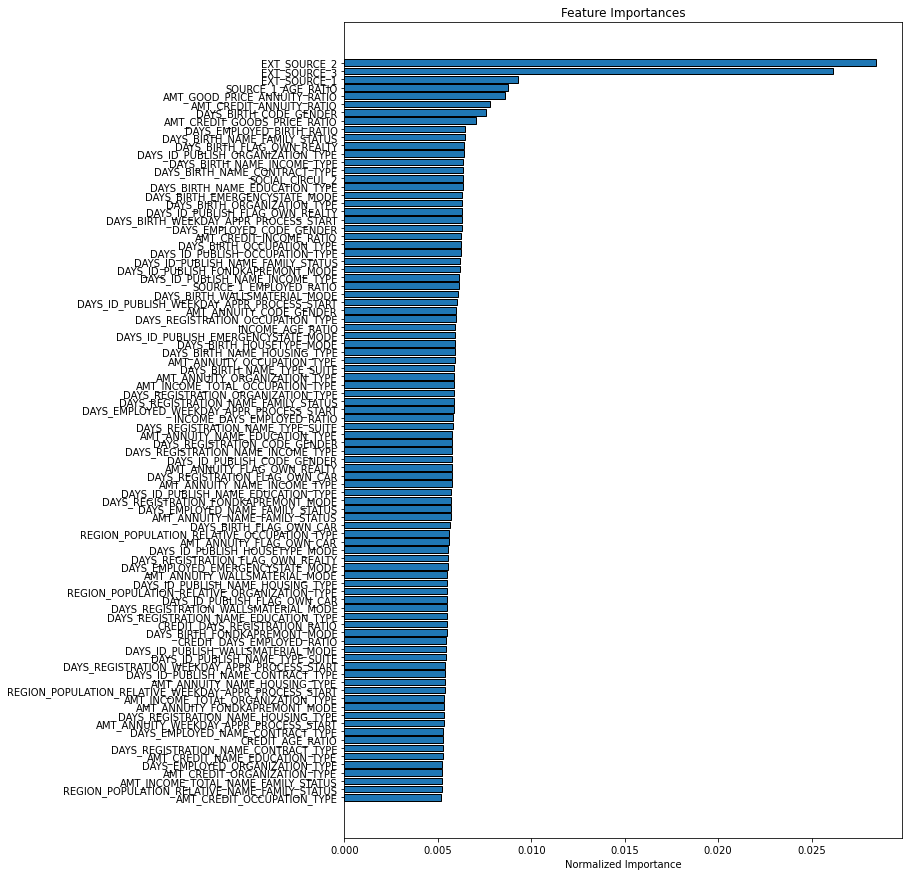

In [353]:
feature_importances_sorted = eng.plot_feature_importances(feature_importances, 90)

In [355]:
feature_importances['PERCENTAGE_100']=feature_importances.importance*100
feature_importances.sort_values('importance', ascending=False)

,feature,importance,PERCENTAGE_100
23,EXT_SOURCE_2,0.028437,2.843718
24,EXT_SOURCE_3,0.026122,2.612200
22,EXT_SOURCE_1,0.009310,0.930981
32,SOURCE_1_AGE_RATIO,0.008746,0.874636
18,AMT_GOOD_PRICE_ANNUITY_RATIO,0.008608,0.860783
19,AMT_CREDIT_ANNUITY_RATIO,0.007812,0.781210
115,DAYS_BIRTH_CODE_GENDER,0.007564,0.756437
20,AMT_CREDIT_GOODS_PRICE_RATIO,0.007017,0.701748
31,DAYS_EMPLOYED_BIRTH_RATIO,0.006450,0.644967
121,DAYS_BIRTH_NAME_FAMILY_STATUS,0.006435,0.643451


# TRAINING

In [358]:
#from sklearn.linear_model import LogisticRegression
LogisReg = LogisticRegression(solver='liblinear', random_state=0)
#.fit(X_train.values, y_train.values)


In [ ]:
eng.modelFitCrossValPredMetrics(LogisReg, X_train, y_train)